In [95]:
import numpy as np
import scipy.io
import itertools # for generting all possible n-grams
import sklearn.metrics
import os 
#for visualization
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

## Process files from 21 languages

In [157]:
import string
import unicodedata
import re
from unidecode import unidecode

#create a function to preprocess the sentences
def preprocess_sentence(sentence):
    
    # Define a translation table to replace non-English characters

    sentence = unidecode (sentence)
    

    # Lowercasing
    sentence = sentence.lower()
    """translation_table = str.maketrans({
        'à': 'a', 'á': 'a', 'â': 'a', 'ã': 'a', 'ä': 'a', 'å': 'a', 'æ': 'ae',
        'ç': 'c', 'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e', 'ì': 'i', 'í': 'i',
        'î': 'i', 'ï': 'i', 'ð': 'd', 'ñ': 'n', 'ò': 'o', 'ó': 'o', 'ό':'o', 'ô': 'o',
        'õ': 'o', 'ö': 'o', 'ø': 'o', 'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u',
        'ý': 'y', 'þ': 'th', 'ÿ': 'y', 'ā': 'a', 'ă': 'a', 'ą': 'a', 'ć': 'c',
        'č': 'c', 'ď': 'd', 'ē': 'e', 'ě': 'e', 'ġ': 'g', 'ħ': 'h', 'ī': 'i',
        'į': 'i', 'ı': 'i', 'ķ': 'k', 'ĺ': 'l', 'ļ': 'l', 'ł': 'l', 'ń': 'n',
        'ň': 'n', 'ō': 'o', 'ő': 'o', 'œ': 'oe', 'ś': 's', 'š': 's', 'ț': 't',
        'ū': 'u', 'ů': 'u', 'ű': 'u', 'ų': 'u', 'ź': 'z', 'ż': 'z', 'ž': 'z',
        'ß': 'ss',
        'а': 'a', 'б': 'b', 'в': 'v', 'г': 'g', 'д': 'd', 'е': 'e', 'ж': 'zh',
        'з': 'z', 'и': 'i', 'й': 'y', 'к': 'k', 'л': 'l', 'м': 'm', 'н': 'n',
        'о': 'o', 'п': 'p', 'р': 'r', 'с': 's', 'т': 't', 'у': 'u', 'ф': 'f',
        'х': 'kh', 'ц': 'ts', 'ч': 'ch', 'ш': 'sh', 'щ': 'sht', 'ъ': 'a',
        'ь': 'y', 'ю': 'yu', 'я': 'ya', 'č': 'c', 'ě': 'e', 'ň': 'n', 'ř': 'r',
        'š': 's', 'ť': 't', 'ů': 'u', 'ž': 'z','α': 'a', 'ά': 'a', 'β': 'b','ς':'c', 
        'γ': 'g', 'δ': 'd', 'ε': 'e', 'ζ': 'z', 'η': 'e',
        'θ': 'th', 'ι': 'i', 'κ': 'k', 'λ': 'l', 'μ': 'm', 'ν': 'n', 'ξ': 'x',
        'ο': 'o', 'π': 'p', 'ρ': 'r', 'σ': 's', 'τ': 't', 'υ': 'u', 'φ': 'f',
        'χ': 'ch', 'ψ': 'ps', 'ω': 'o', 'ί': 'i', 'ύ': 'u', 'ώ': 'o', 'ή': 'i','έ': 'e',
        'ṣ':'s', 'ṯ':'t', 'ḥ':'h', 'ə':'e'
    })

    # Apply the translation
    sentence = sentence.translate(translation_table)
    """
    # Remove Numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())

    # Remove Punctuation
    sentence = ''.join(char for char in sentence if char not in string.punctuation)

    #Remove special characters
    sentence = ''.join(char for char in sentence if char.isalnum() or char.isspace())

    #Some characters are not considered digits nor letters such as ¼, so we use another condition
    unwanted_characters = ['¼','½','¾']
    sentence = ''.join(char for char in sentence if char not in  unwanted_characters )


    return sentence


#folder path with all the files
from pathlib import Path
parent_dir_sentences = "./sentences_training/"
own_training_data = {}
own_training_data["labels"] = []
own_training_data["sentences"] = [""]*21

for (i,path) in enumerate(os.listdir(parent_dir_sentences)):
    #for good measure we check if what we are iterating is a file (we know all of them are but this is good measure)
    if os.path.isfile(os.path.join(parent_dir_sentences, path)):
        own_training_data["labels"].append((Path(path).stem))
        with open(os.path.join(parent_dir_sentences, path), "r", encoding="utf-8") as my_file_read:
            for line in my_file_read:
                index, content = line.strip().split('\t')
                if int(index) >= 100:
                    continue
                sentence = preprocess_sentence(content)
                own_training_data["sentences"][i] += sentence




In [97]:
parent_dir_sentences_1 = "./sentences_testing/"
own_testing_data = {}
own_testing_data["labels"] = []
own_testing_data["sentences"] = [""]*21

for (i,path) in enumerate(os.listdir(parent_dir_sentences_1)):
    #for good measure we check if what we are iterating is a file (we know all of them are but this is good measure)
    if os.path.isfile(os.path.join(parent_dir_sentences_1, path)):
        own_testing_data["labels"].append((Path(path).stem))
        with open(os.path.join(parent_dir_sentences_1, path), "r", encoding="utf-8") as my_file_read:
            count_parentheses = 0
            for (e,line) in enumerate(my_file_read):
                if int(e - count_parentheses) >= 100:
                    continue
                line = line.strip('\n')
                if line.startswith('(') and line.endswith(')'):
                    count_parentheses += 1
                    continue
                sentence = preprocess_sentence(line)
                sentence = sentence.replace('\t', '').replace('\n', '')
                own_testing_data["sentences"][i] += sentence

## Create N_grams and encode them in HD space using {-1,+1} coordinates

In [186]:
alphabet = unidecode(' abcdefghijklmnopqrstuvwxyz')
n = 3
N_GRAMS=[p for p in itertools.product(alphabet, repeat=n)] # get all possible n-grams
#print(N_GRAMS)

def initialize_random_item_memory(alphabet_size, hd_dimension):
    return np.random.choice([-1, 1], size=(alphabet_size, hd_dimension))

def fixed_permutation(hd_vector, permutation_vector):
    return hd_vector * permutation_vector

def generate_hd_vector(symbol_position, hd_memory, permutation_vector):
    permuted_vector = fixed_permutation(hd_memory[symbol_position], permutation_vector)
    return permuted_vector

def form_ngram_hd_vector(ngram, hd_memory, permutation_matrix):
    ngram_length = len(ngram)
    ngram_hd_vector = np.ones(hd_memory.shape[1])  # Initialize to all ones for element-wise multiplication

    for j in range(ngram_length):
        if ngram[j].isspace():
            symbol_position = 26
        else:
            symbol_position = ord(ngram[j]) - ord('a')  # Assuming lowercase English alphabet
        permuted_vector = generate_hd_vector(symbol_position, hd_memory, permutation_matrix[j])
        ngram_hd_vector *= permuted_vector  # Use element-wise multiplication here

    return ngram_hd_vector

# Example usage
alphabet_size = 27  # Size of the English alphabet
hd_dimension = 1000  # Hyperdimensional vector dimension
ngram = 'cba'  # Example trigram

# Step 1: Initialize random item memory H
random_item_memory = initialize_random_item_memory(alphabet_size, hd_dimension)

# Step 2: Generate fixed permutation matrix
permutation_matrix = [np.random.choice([-1, 1], size=hd_dimension) for _ in range(n)] #we create a permutation vector for each position which will 
# help us keep positional information when permuting the hd vectors when we form the encoding for the specific ngram.

# Print permutation vectors for debugging
#for i, permuted_vector in enumerate(permutation_matrix):
#    print(f'Permutation Vector {i + 1}: {permuted_vector}')

# Step 3: Form HD vector for the given n-gram

#ngram_hd_vector = form_ngram_hd_vector(ngram, random_item_memory, permutation_matrix)
encoded_N_GRAMS = {}
for i in N_GRAMS:
    encoded_N_GRAMS[str(i)] = form_ngram_hd_vector(i, random_item_memory, permutation_matrix)

#print(encoded_N_GRAMS["('a', 'a', 'a')"])


## Training process: creating N_grams for the languages from the training data

In [187]:
# collect n-gram statitics for all training data 
TR_grams=[[0]*hd_dimension]*21 # initialize n-gram statistics for the  training
#print(TR_grams.shape)
for i in range(len(own_training_data["labels"])):
    print(own_training_data["labels"][i])
    working_lang = own_training_data["sentences"][i]
    for j in range (len(working_lang) - (n-1)):
        ngc=working_lang [j:(j+(n))] #pick current n-gram
        ngc1= tuple(ngc)
        #ind_ngc=N_GRAMS.index(ngc1) # find index in  N_GRAMS
        TR_grams[i]+=encoded_N_GRAMS[str(ngc1)] #increment the corresponding statisticss
#print(TR_grams) 

bulgarian
czech
danish
dutch
english
estonian
finnish
french
german
greek
hungarian
italian
latvian
lithuanian
polish
portuguese
romanian
slovak
slovenian
spanish
swedish


In [188]:
# collect n-gram statistics for all testing data 
labels_size = len(own_testing_data["labels"])
number_of_tests = 5 
TS_grams = [[0] * hd_dimension for _ in range(labels_size * number_of_tests)]  # initialize n-gram statistics for the test example
GT = [None] * labels_size * number_of_tests  # ground truth  
PR = [None] * labels_size * number_of_tests  # prediction

for i in range(labels_size):    
    working_lang = own_testing_data["sentences"][i]
    for j in range(number_of_tests):
        try:
            working_lang_used = working_lang[j * int(len(working_lang) / number_of_tests):(j + 1) * int(len(working_lang) / number_of_tests)]
        except:
            working_lang_used = working_lang[j * int(len(working_lang) / number_of_tests):]
        # Initialize TS_grams for each test example
        for k in range(len(working_lang_used) - (n - 1)): 
            ngc = working_lang_used[k:(k + n)]  # pick current n-gram
            ngc = tuple(ngc)
            # Check if the n-gram is in encoded_N_GRAMS
            TS_grams[i * number_of_tests + j] += encoded_N_GRAMS.get(str(ngc), [0] * hd_dimension)  # increment the corresponding statistics
        DP = np.dot(np.array(TS_grams[i * number_of_tests + j]).reshape(1, -1), np.array(TR_grams).transpose())
        ind = np.argmax(DP)  # index of predicted language
        PR[i * number_of_tests + j] = own_testing_data["labels"][ind]
        GT[i * number_of_tests + j] = own_testing_data["labels"][i]  # add ground truth


In [189]:
# accuracy and F1-Score
from sklearn.metrics import f1_score
acc=0.0
for i in range(len(GT)):
   acc+=(PR[i]==GT[i])
F1_Score = f1_score(GT, PR, average='weighted')
acc=acc/len(GT) 
print(f"The accuracy of the language detection algorithm using fixed size hd encoding of N_GRAMS with dimension\
 {hd_dimension}, is {100*acc}%, while the F1-Score is {F1_Score}")

The accuracy of the language detection algorithm using fixed size hd encoding of N_GRAMS with dimension 1000, is 63.8095238095238%, while the F1-Score is 0.5717124490416416


<Axes: >

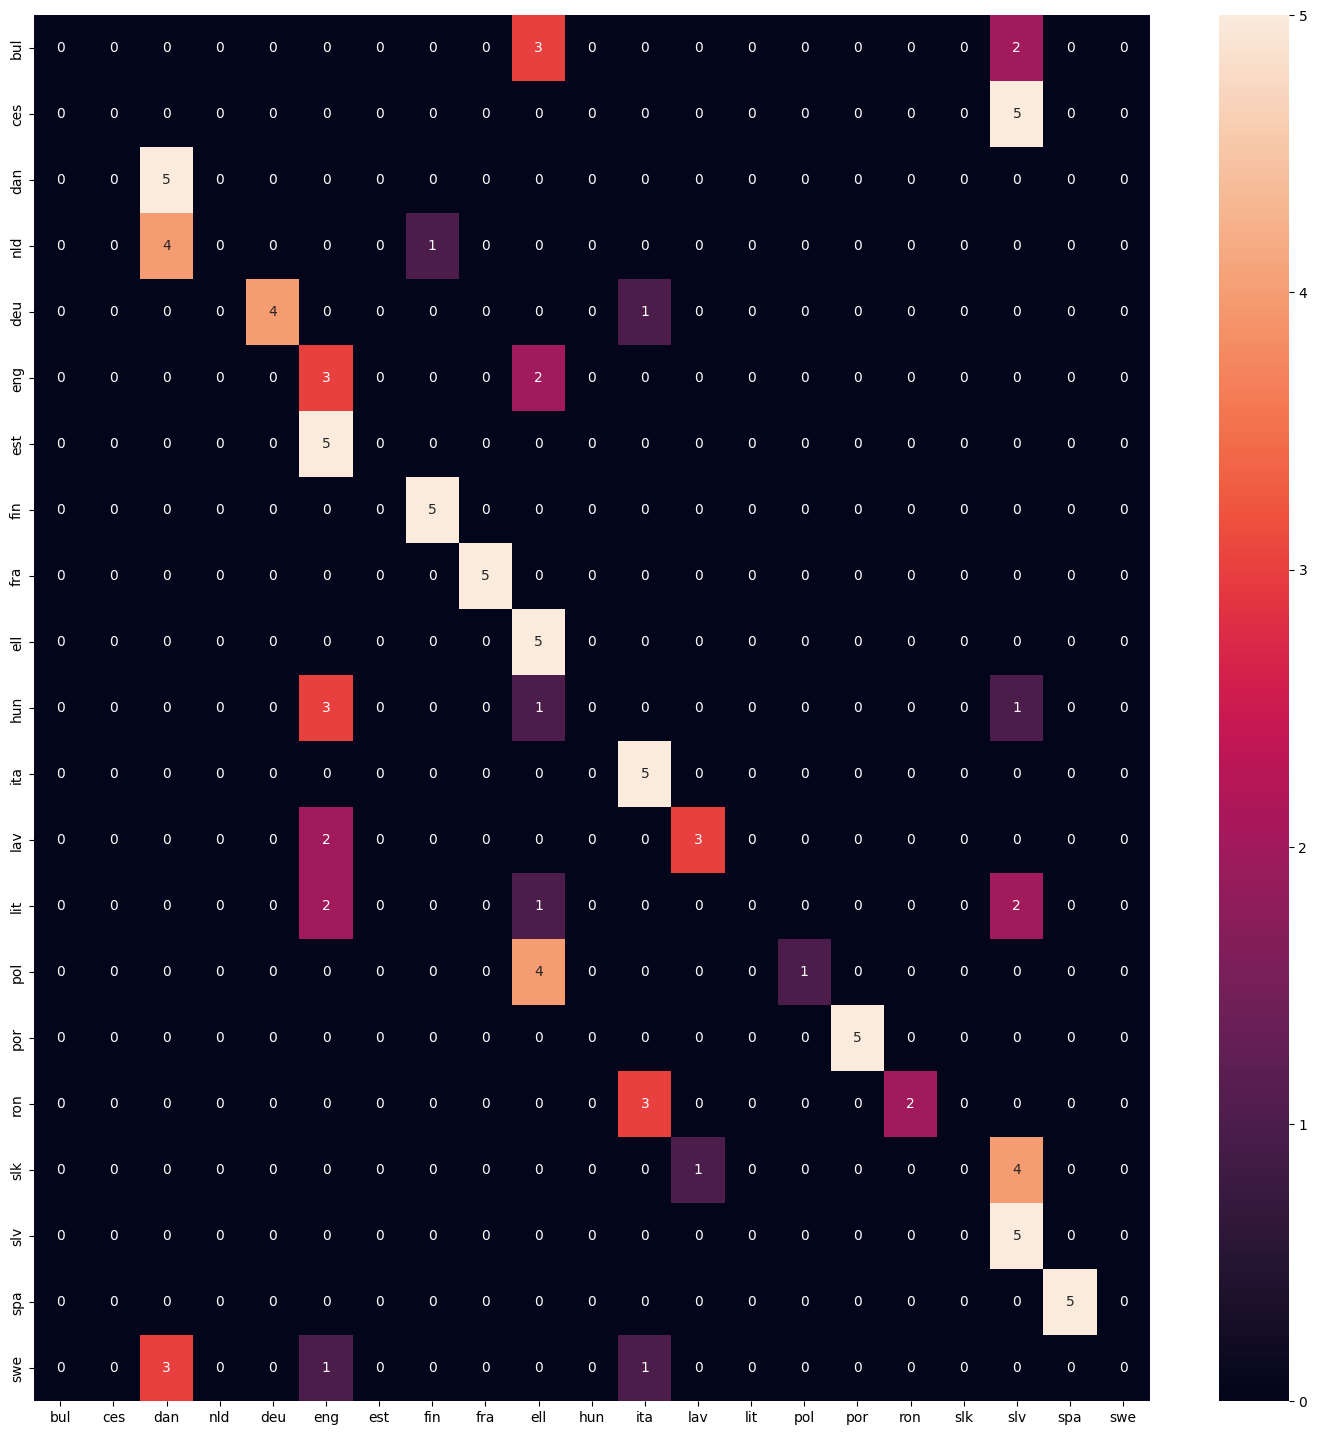

In [126]:
conf_mat= sklearn.metrics.confusion_matrix(GT, PR, labels=None, sample_weight=None)
Labels_arr = ['bul', 'ces', 'dan', 'nld', 'deu', 'eng', 'est', 'fin', 'fra',
       'ell', 'hun', 'ita', 'lav', 'lit', 'pol', 'por', 'ron', 'slk',
       'slv', 'spa', 'swe']
#plot confusion matrix
%matplotlib inline
df_cm = pd.DataFrame(conf_mat, index = [i for i in Labels_arr], columns = [j for j in Labels_arr])
plt.figure(figsize = (18,18))
sn.heatmap(df_cm, annot=True)